# GRASPシミュレーション結果のプロット

GRASPシミュレーションで生成される、.grdファイルを読み込んで、mW と dBm のプロットするプログラム

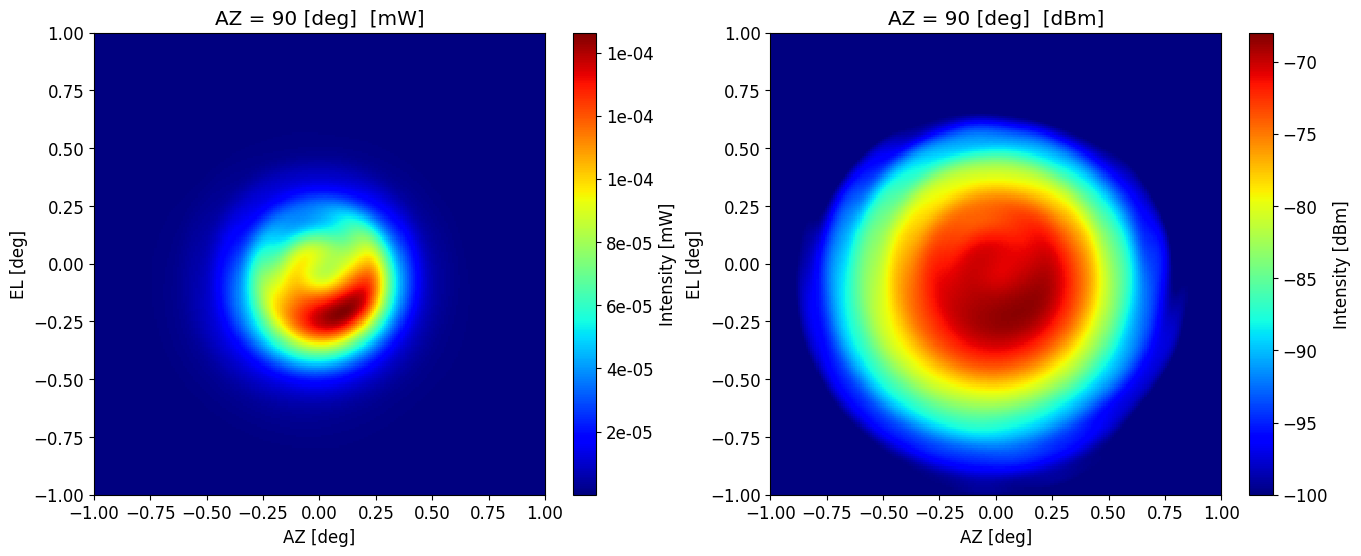

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"data/az_90.grd",
                   skiprows=8, header=None, names=["1", "2", "3", "4", "5", "6"],
                   delimiter='\s+', dtype=float)

intensity_mW = (data["1"]**2 + data["2"]**2) * 1e3
intensity_dBm = 10 * np.log10(data["1"]**2 + data["2"]**2)

# データを2次元配列に変換（301 x 301）
intensity_mW = intensity_mW.values.reshape(301, 301)
intensity_dBm = intensity_dBm.values.reshape(301, 301)

# 上下左右反転
intensity_mW = np.flipud(np.fliplr(intensity_mW))
intensity_dBm = np.flipud(np.fliplr(intensity_dBm))

# X, Y グリッド生成
x = np.linspace(-1.36393, 1.36393, 301)
y = np.linspace(-1.36393, 1.36393, 301)
X, Y = np.meshgrid(x, y)

plt.rcParams["font.size"] = 12
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.pcolormesh(X, Y, intensity_mW, cmap='jet')
plt.colorbar(label='Intensity [mW]', format='%.0e')
plt.xlabel('AZ [deg]')
plt.ylabel('EL [deg]')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('AZ = 90 [deg]  [mW]')

plt.subplot(1, 2, 2)
plt.pcolormesh(X, Y, intensity_dBm, cmap='jet', vmin=-100, vmax=-68)
plt.colorbar(label='Intensity [dBm]')
plt.xlabel('AZ [deg]')
plt.ylabel('EL [deg]')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('AZ = 90 [deg]  [dBm]')

plt.show()